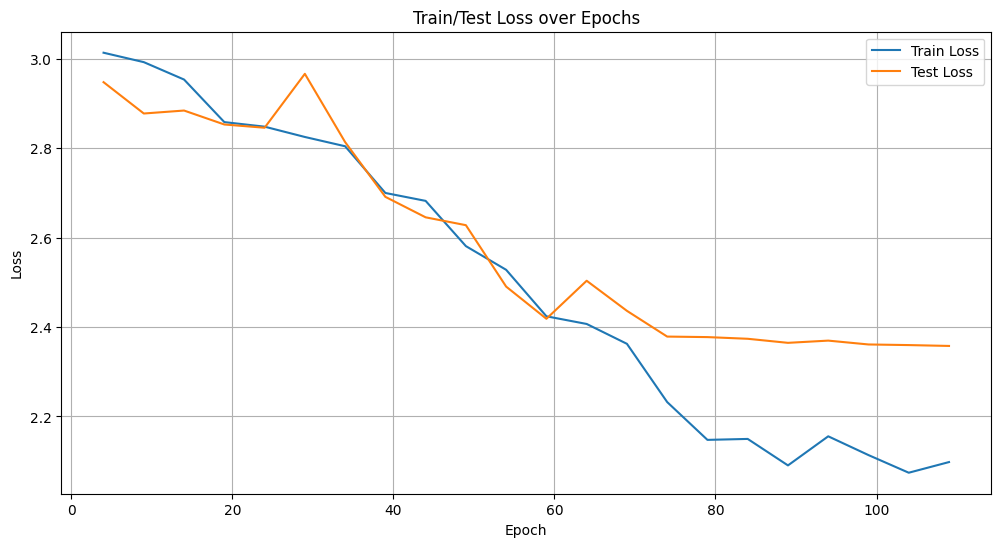

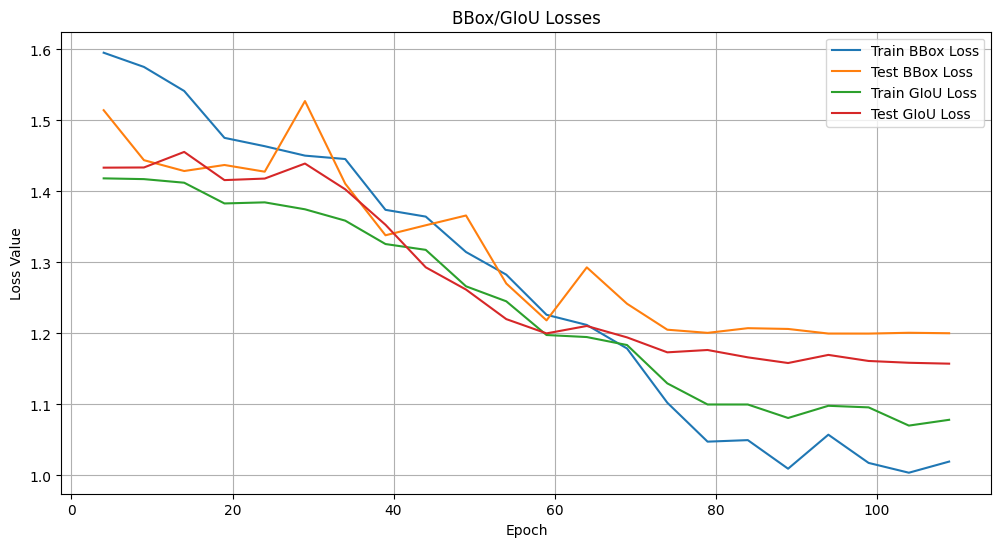

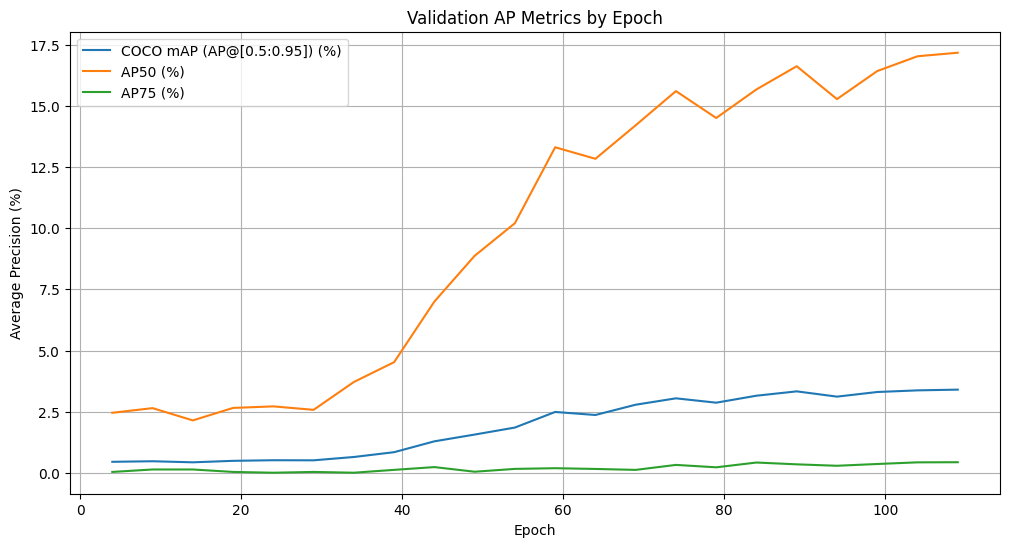

Best COCO mAP (AP@[0.5:0.95]): 3.40% at epoch 109
Best AP50: 17.17% at epoch 109
Best AP75: 0.44% at epoch 109


In [1]:
import json
import matplotlib.pyplot as plt

logpath = "/data/sundeep/Point-Beyond-Class/Output/outfiles/models/RSNA/exp1_stage1_data30p_baseline/log.txt"
epochs = []
train_losses, test_losses = [], []
train_loss_bbox, test_loss_bbox = [], []
train_loss_giou, test_loss_giou = [], []
ap50s, ap_coco, ap75s = [], [], []

with open(logpath, "r") as f:
    for line in f:
        if not line.strip():
            continue
        entry = json.loads(line)
        epoch = entry.get("epoch")
        epochs.append(epoch)
        train_losses.append(entry.get("train_loss"))
        test_losses.append(entry.get("test_loss"))
        train_loss_bbox.append(entry.get("train_loss_bbox"))
        test_loss_bbox.append(entry.get("test_loss_bbox"))
        train_loss_giou.append(entry.get("train_loss_giou"))
        test_loss_giou.append(entry.get("test_loss_giou"))
        test_coco_eval_bbox = entry.get("test_coco_eval_bbox", [])
        if len(test_coco_eval_bbox) > 2:
            ap_coco.append(test_coco_eval_bbox[0])
            ap50s.append(test_coco_eval_bbox[1])
            ap75s.append(test_coco_eval_bbox[2])
        else:
            ap_coco.append(None)
            ap50s.append(None)
            ap75s.append(None)

# Plot Losses
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/Test Loss over Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot BBox and GIoU Losses
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss_bbox, label="Train BBox Loss")
plt.plot(epochs, test_loss_bbox, label="Test BBox Loss")
plt.plot(epochs, train_loss_giou, label="Train GIoU Loss")
plt.plot(epochs, test_loss_giou, label="Test GIoU Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("BBox/GIoU Losses")
plt.legend()
plt.grid()
plt.show()

# Plot COCO AP@[IoU=.50:.95], AP50, AP75
plt.figure(figsize=(12,6))
plt.plot(epochs, [ap*100 if ap is not None else None for ap in ap_coco], label="COCO mAP (AP@[0.5:0.95]) (%)")
plt.plot(epochs, [ap*100 if ap is not None else None for ap in ap50s], label="AP50 (%)")
plt.plot(epochs, [ap*100 if ap is not None else None for ap in ap75s], label="AP75 (%)")
plt.xlabel("Epoch")
plt.ylabel("Average Precision (%)")
plt.title("Validation AP Metrics by Epoch")
plt.legend()
plt.grid()
plt.show()

# Print the best AP@[0.5:0.95] (COCO mAP), AP50, AP75
def get_best_metric(metric_list, epochs):
    max_val = max([x for x in metric_list if x is not None])
    best_idx = [i for i, x in enumerate(metric_list) if x == max_val][0]
    best_epoch = epochs[best_idx]
    return max_val, best_epoch

max_coco, best_coco_epoch = get_best_metric(ap_coco, epochs)
max_ap50, best_ap50_epoch = get_best_metric(ap50s, epochs)
max_ap75, best_ap75_epoch = get_best_metric(ap75s, epochs)

print(f"Best COCO mAP (AP@[0.5:0.95]): {max_coco*100:.2f}% at epoch {best_coco_epoch}")
print(f"Best AP50: {max_ap50*100:.2f}% at epoch {best_ap50_epoch}")
print(f"Best AP75: {max_ap75*100:.2f}% at epoch {best_ap75_epoch}")
